In [11]:
import pandas as pd
import xml.etree.ElementTree as ET

def parse_drugbank_xml(xml_file):
    '''
    Parse the XML file and extract pathway information for each drug.
    '''
    
    # Parse the XML file
    tree = ET.parse(xml_file)
    root = tree.getroot()

    # Define namespaces
    ns = {'drugbank': 'http://www.drugbank.ca'}

    # Initialize lists to store data
    data = {
        'drugbank_id': [],
        'name': [],
        'type': [],
        'form': [],
        'indications': [],
        'description': [],
        'cas_number': [],
        'unii': [],
        'state': [],
        'groups': [],
        'articles': [],
        'links': [],
        'indication': [],
        'pharmacodynamics': [],
        'mechanism_of_action': [],
        'toxicity': [],
        'metabolism': [],
        'absorption': [],
        'half_life': [],
        'protein_binding': [],
        'route_of_elimination': [],
        'volume_of_distribution': [],
        'clearance': [],
        'classification': [],
        'salts': [],
        'synonyms': [],
        'products': [],
        'packagers': [],
        'manufacturers': [],
        'prices': [],
        'categories': [],
        'affected_organisms': [],
        'dosages': [],
        'atc_codes': [],
        'patents': [],
        'food_interactions': [],
        'drug_interactions': [],
        'drug_id': [],
        'product_name': [],
        'manufacturer': [],
        'national_drug_code': [],
        'route_of_administration': [],
        'dose_information': [],
        'country': [],
        'regulatory_agency': [],
        'pathway_name': [],
        'pathway_category': [],
        'processes': [],
        'targets': []
    }

    # Helper function to get text or None
    def text_or_empty(element):
        return element.text if element is not None and element != 'None' else None

    # Extract data
    for drug in root.findall('drugbank:drug', ns):
        data['drugbank_id'].append(text_or_empty(drug.find('drugbank:drugbank-id[@primary="true"]', ns)))
        data['name'].append(text_or_empty(drug.find('drugbank:name', ns)))
        data['type'].append(drug.attrib.get('type'))
        data['description'].append(text_or_empty(drug.find('drugbank:description', ns)))
        data['cas_number'].append(text_or_empty(drug.find('drugbank:cas-number', ns)))
        data['unii'].append(text_or_empty(drug.find('drugbank:unii', ns)))
        data['state'].append(text_or_empty(drug.find('drugbank:state', ns)))
        
        # Extract groups
        groups = [group.text for group in drug.findall('drugbank:groups/drugbank:group', ns)]
        data['groups'].append(groups if groups else None)
        
        # Extract general references articles
        articles = []
        for article in drug.findall('drugbank:general-references/drugbank:articles/drugbank:article', ns):
            articles.append({
                'ref-id': text_or_empty(article.find('drugbank:ref-id', ns)),
                'pubmed-id': text_or_empty(article.find('drugbank:pubmed-id', ns)),
                'citation': text_or_empty(article.find('drugbank:citation', ns))
            })
        data['articles'].append(articles if articles else None)
        
        # Extract links
        links = []
        for link in drug.findall('drugbank:general-references/drugbank:links/drugbank:link', ns):
            links.append({
                'ref-id': text_or_empty(link.find('drugbank:ref-id', ns)),
                'title': text_or_empty(link.find('drugbank:title', ns)),
                'url': text_or_empty(link.find('drugbank:url', ns))
            })
        data['links'].append(links if links else None)
        
        data['indication'].append(text_or_empty(drug.find('drugbank:indication', ns)))
        data['pharmacodynamics'].append(text_or_empty(drug.find('drugbank:pharmacodynamics', ns)))
        data['mechanism_of_action'].append(text_or_empty(drug.find('drugbank:mechanism-of-action', ns)))
        data['toxicity'].append(text_or_empty(drug.find('drugbank:toxicity', ns)))
        data['metabolism'].append(text_or_empty(drug.find('drugbank:metabolism', ns)))
        data['absorption'].append(text_or_empty(drug.find('drugbank:absorption', ns)))
        data['half_life'].append(text_or_empty(drug.find('drugbank:half-life', ns)))
        data['protein_binding'].append(text_or_empty(drug.find('drugbank:protein-binding', ns)))
        data['route_of_elimination'].append(text_or_empty(drug.find('drugbank:route-of-elimination', ns)))
        data['volume_of_distribution'].append(text_or_empty(drug.find('drugbank:volume-of-distribution', ns)))
        data['clearance'].append(text_or_empty(drug.find('drugbank:clearance', ns)))
        
        # Extract form
        form = [form.text for form in drug.findall('drugbank:dosages/drugbank:dosage/drugbank:form', ns)]
        data['form'].append(form if form else None)
        
        # Extract indications
        indications = [indication.text for indication in drug.findall('drugbank:indication', ns)]
        data['indications'].append(indications if indications else None)
        
        # Extract classification with checks
        classification = {
            'description': text_or_empty(drug.find('drugbank:classification/drugbank:description', ns)),
            'direct-parent': text_or_empty(drug.find('drugbank:classification/drugbank:direct-parent', ns)),
            'kingdom': text_or_empty(drug.find('drugbank:classification/drugbank:kingdom', ns)),
            'superclass': text_or_empty(drug.find('drugbank:classification/drugbank:superclass', ns)),
            'class': text_or_empty(drug.find('drugbank:classification/drugbank:class', ns)),
            'subclass': text_or_empty(drug.find('drugbank:classification/drugbank:subclass', ns))
        }
        data['classification'].append(classification)
        
        # Extract synonyms
        synonyms = [synonym.text for synonym in drug.findall('drugbank:synonyms/drugbank:synonym', ns)]
        data['synonyms'].append(synonyms if synonyms else None)
        
        # Extract products
        products = []
        for product in drug.findall('drugbank:products/drugbank:product', ns):
            products.append({
                'name': text_or_empty(product.find('drugbank:name', ns)),
                'labeller': text_or_empty(product.find('drugbank:labeller', ns)),
                'ndc-product-code': text_or_empty(product.find('drugbank:ndc-product-code', ns)),
                'dpd-id': text_or_empty(product.find('drugbank:dpd-id', ns)),
                'ema-product-code': text_or_empty(product.find('drugbank:ema-product-code', ns)),
                'ema-ma-number': text_or_empty(product.find('drugbank:ema-ma-number', ns)),
                'started-marketing-on': text_or_empty(product.find('drugbank:started-marketing-on', ns)),
                'ended-marketing-on': text_or_empty(product.find('drugbank:ended-marketing-on', ns)),
                'dosage-form': text_or_empty(product.find('drugbank:dosage-form', ns)),
                'strength': text_or_empty(product.find('drugbank:strength', ns)),
                'route': text_or_empty(product.find('drugbank:route', ns)),
                'fda-application-number': text_or_empty(product.find('drugbank:fda-application-number', ns)),
                'generic': text_or_empty(product.find('drugbank:generic', ns)),
                'over-the-counter': text_or_empty(product.find('drugbank:over-the-counter', ns)),
                'approved': text_or_empty(product.find('drugbank:approved', ns)),
                'country': text_or_empty(product.find('drugbank:country', ns)),
                'source': text_or_empty(product.find('drugbank:source', ns))
            })
        data['products'].append(products if products else None)
        
        # Extract packagers
        packagers = []
        for packager in drug.findall('drugbank:packagers/drugbank:packager', ns):
            packagers.append({
                'name': text_or_empty(packager.find('drugbank:name', ns)),
                'url': text_or_empty(packager.find('drugbank:url', ns))
            })
        data['packagers'].append(packagers if packagers else None)
        
        # Extract manufacturers
        manufacturers = [manufacturer.text for manufacturer in drug.findall('drugbank:manufacturers/drugbank:manufacturer', ns)]
        data['manufacturers'].append(manufacturers if manufacturers else None)
        
        # Extract prices
        prices = []
        for price in drug.findall('drugbank:prices/drugbank:price', ns):
            prices.append({
                'description': text_or_empty(price.find('drugbank:description', ns)),
                'cost': text_or_empty(price.find('drugbank:cost', ns)),
                'currency': price.find('drugbank:cost', ns).attrib['currency'] if price.find('drugbank:cost', ns) is not None else None,
                'unit': text_or_empty(price.find('drugbank:unit', ns))
            })
        data['prices'].append(prices if prices else None)
        
        # Extract categories
        categories = []
        for category in drug.findall('drugbank:categories/drugbank:category', ns):
            categories.append({
                'category': text_or_empty(category.find('drugbank:category', ns)),
                'mesh-id': text_or_empty(category.find('drugbank:mesh-id', ns))
            })
        data['categories'].append(categories if categories else None)
        
        # Extract affected organisms
        affected_organisms = [organism.text for organism in drug.findall('drugbank:affected-organisms/drugbank:affected-organism', ns)]
        data['affected_organisms'].append(affected_organisms if affected_organisms else None)
        
        # Extract dosages
        dosages = []
        for dosage in drug.findall('drugbank:dosages/drugbank:dosage', ns):
            dosages.append({
                'form': text_or_empty(dosage.find('drugbank:form', ns)),
                'route': text_or_empty(dosage.find('drugbank:route', ns)),
                'strength': text_or_empty(dosage.find('drugbank:strength', ns))
            })
        data['dosages'].append(dosages if dosages else None)
        
        # Extract ATC codes
        atc_codes = []
        for atc_code in drug.findall('drugbank:atc-codes/drugbank:atc-code', ns):
            levels = [level.text for level in atc_code.findall('drugbank:level', ns)]
            atc_codes.append({
                'code': atc_code.attrib['code'],
                'levels': levels
            })
        data['atc_codes'].append(atc_codes if atc_codes else None)
        
        # Extract patents
        patents = []
        for patent in drug.findall('drugbank:patents/drugbank:patent', ns):
            patents.append({
                'number': text_or_empty(patent.find('drugbank:number', ns)),
                'country': text_or_empty(patent.find('drugbank:country', ns)),
                'approved': text_or_empty(patent.find('drugbank:approved', ns)),
                'expires': text_or_empty(patent.find('drugbank:expires', ns)),
                'pediatric-extension': text_or_empty(patent.find('drugbank:pediatric-extension', ns))
            })
        data['patents'].append(patents if patents else None)
        
        # Extract food interactions
        food_interactions = [interaction.text for interaction in drug.findall('drugbank:food-interactions/drugbank:food-interaction', ns)]
        data['food_interactions'].append(food_interactions if food_interactions else None)
        
        # Extract drug interactions
        drug_interactions = []
        for interaction in drug.findall('drugbank:drug-interactions/drugbank:drug-interaction', ns):
            drug_interactions.append({
                'drugbank-id': text_or_empty(interaction.find('drugbank:drugbank-id', ns)),
                'name': text_or_empty(interaction.find('drugbank:name', ns)),
                'description': text_or_empty(interaction.find('drugbank:description', ns))
            })
        data['drug_interactions'].append(drug_interactions if drug_interactions else None)
        
        # Extract drug ID
        data['drug_id'].append(text_or_empty(drug.find('drugbank:drugbank-id', ns)))
        
        # Extract product name
        product_name = [product_name.text for product_name in drug.findall('drugbank:products/drugbank:product/drugbank:name', ns)]
        data['product_name'].append(product_name if product_name else None)
        
        # Extract manufacturer
        manufacturer = [manufacturer.text for manufacturer in drug.findall('drugbank:products/drugbank:product/drugbank:labeller', ns)]
        data['manufacturer'].append(manufacturer if manufacturer else None)
        
        # Extract national drug code
        national_drug_code = [national_drug_code.text for national_drug_code in drug.findall('drugbank:products/drugbank:product/drugbank:ndc-product-code', ns)]
        data['national_drug_code'].append(national_drug_code if national_drug_code else None)
        
        # Extract route of administration
        route_of_administration = [route_of_administration.text for route_of_administration in drug.findall('drugbank:dosages/drugbank:dosage/drugbank:route', ns)]
        data['route_of_administration'].append(route_of_administration if route_of_administration else None)
        
        # Extract dose information
        dose_information = [dose_information.text for dose_information in drug.findall('drugbank:dosages/drugbank:dosage/drugbank:strength', ns)]
        data['dose_information'].append(dose_information if dose_information else None)
        
        # Extract country
        country = [country.text for country in drug.findall('drugbank:products/drugbank:product/drugbank:country', ns)]
        data['country'].append(country if country else None)
        
        # Extract regulatory agency
        regulatory_agency = [regulatory_agency.text for regulatory_agency in drug.findall('drugbank:products/drugbank:product/drugbank:source', ns)]
        data['regulatory_agency'].append(regulatory_agency if regulatory_agency else None)

        # Extract pathways
        pathway_names = []
        pathway_categories = []
        for pathway in drug.findall('drugbank:pathways/drugbank:pathway', ns):
            pathway_names.append(text_or_empty(pathway.find('drugbank:name', ns)))
            pathway_categories.append(text_or_empty(pathway.find('drugbank:category', ns)))
        data['pathway_name'].append(pathway_names if pathway_names else None)
        data['pathway_category'].append(pathway_categories if pathway_categories else None)

        # Extract processes from go-classifier
        processes = [process.find('drugbank:description', ns).text for process in drug.findall('drugbank:go-classifiers/drugbank:go-classifier', ns)]
        data['processes'].append(processes if processes else None)

    # Ensure all lists are the same length
    max_len = max(len(v) for v in data.values())
    for key, value in data.items():
        if len(value) < max_len:
            data[key].extend([None] * (max_len - len(value)))

    # Convert data to DataFrame
    df_ret = pd.DataFrame(data)
    return df_ret

# Function to remove duplicates from lists in all cells of a DataFrame
def remove_duplicates_from_lists(df):
    
    def remove_duplicates(cell):
        if isinstance(cell, list):
            seen = []
            for item in cell:
                if item not in seen:
                    seen.append(item)
            return seen
        return cell

    # Apply the remove_duplicates function to all cells in the DataFrame
    df = df.map(remove_duplicates)
    
    return df

# Usage example
xml_file_path = "drugbank_partial(1).xml"
df_main = parse_drugbank_xml(xml_file_path)
df_main = remove_duplicates_from_lists(df_main)
df_main.columns

Index(['drugbank_id', 'name', 'type', 'form', 'indications', 'description',
       'cas_number', 'unii', 'state', 'groups', 'articles', 'links',
       'indication', 'pharmacodynamics', 'mechanism_of_action', 'toxicity',
       'metabolism', 'absorption', 'half_life', 'protein_binding',
       'route_of_elimination', 'volume_of_distribution', 'clearance',
       'classification', 'salts', 'synonyms', 'products', 'packagers',
       'manufacturers', 'prices', 'categories', 'affected_organisms',
       'dosages', 'atc_codes', 'patents', 'food_interactions',
       'drug_interactions', 'drug_id', 'product_name', 'manufacturer',
       'national_drug_code', 'route_of_administration', 'dose_information',
       'country', 'regulatory_agency', 'pathway_name', 'pathway_category',
       'processes', 'targets'],
      dtype='object')

In [12]:
# 1)
import pandas as pd

def extract_drug_info(df):
    columns = [
        'drugbank_id', 'name', 'type', 'description', 
        'form', 'indications', 'mechanism_of_action', 'food_interactions'
    ]
    drug_info_df = df[columns].copy()
    return drug_info_df
    
new_df = extract_drug_info(df_main)
new_df

,drugbank_id,name,type,description,form,indications,mechanism_of_action,food_interactions
0,DB00001,Lepirudin,biotech,Lepirudin is a recombinant hirudin formed by 6...,"[Injection, powder, for suspension, Injection,...",[Lepirudin is indicated for anticoagulation in...,Lepirudin is a direct thrombin inhibitor used ...,[Avoid herbs and supplements with anticoagulan...
1,DB00002,Cetuximab,biotech,Cetuximab is a recombinant chimeric human/mous...,"[Injection, Injection, solution, Solution]",[Cetuximab indicated for the treatment of loca...,The epidermal growth factor receptor (EGFR) is...,None
2,DB00003,Dornase alfa,biotech,Dornase alfa is a biosynthetic form of human d...,"[Aerosol, spray, Solution]",[Used as adjunct therapy in the treatment of c...,Dornase alfa is a biosynthetic form of human D...,None
3,DB00004,Denileukin diftitox,biotech,A recombinant DNA-derived cytotoxic protein co...,"[Injection, solution]",[For treatment of cutaneous T-cell lymphoma],Denileukin diftitox binds to the high-affinity...,None
4,DB00005,Etanercept,biotech,Dimeric fusion protein consisting of the extra...,"[Injection, solution, Injection, Injection, po...",[Etanercept is indicated for the treatment of ...,There are two distinct receptors for TNF (TNFR...,None
...,...,...,...,...,...,...,...,...
95,DB00104,Octreotide,biotech,Acromegaly is a disorder caused by excess grow...,"[Injection, Solution, Injection, powder, for s...",[Octreotide by injection is used for the treat...,Octreotide binds to somatostatin receptors cou...,[Take on an empty stomach. The oral capsules s...
96,DB00105,Interferon alfa-2b,biotech,Interferon alpha 2b (human leukocyte clone hif...,"[Injection, powder, lyophilized, for solution,...","[For the treatment of hairy cell leukemia, mal...",Interferon alpha binds to type I interferon re...,[Avoid alcohol.]
97,DB00106,Abarelix,small molecule,Synthetic decapeptide antagonist to gonadotrop...,None,[For palliative treatment of advanced prostate...,Abarelix binds to the gonadotropin releasing h...,None
98,DB00107,Oxytocin,biotech,Sir Henry H. Dale first identified oxytocin an...,"[Liquid, Solution, Injection, solution, Inject...",[Administration of exogenous oxytocin is indic...,Oxytocin plays a vital role in labour and deli...,None


In [13]:
# 2)
import pandas as pd
import xml.etree.ElementTree as ET
import networkx as nx
import plotly.graph_objects as go

def extract_synonyms(df):
    columns = [
        'drugbank_id', 'synonyms'
    ]
    synonyms_df = df[columns].copy()
    return synonyms_df

def plot_synonyms_graph(df, drugbank_id):
    # Find the synonyms for the given DrugBank ID
    df_work = extract_synonyms(df)
    synonyms = df_work.loc[df['drugbank_id'] == drugbank_id, 'synonyms'].values
    if len(synonyms) == 0:
        print(f"No synonyms found for DrugBank ID: {drugbank_id}")
        return

    synonyms = synonyms[0]

    # Create a graph
    G = nx.Graph()

    # Add nodes and edges
    G.add_node(drugbank_id)
    for synonym in synonyms:
        G.add_node(synonym)
        G.add_edge(drugbank_id, synonym)

    # Get positions for nodes
    pos = nx.spring_layout(G)

    # Create Plotly graph objects
    edge_x = []
    edge_y = []
    for edge in G.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_x.append(x0)
        edge_x.append(x1)
        edge_x.append(None)
        edge_y.append(y0)
        edge_y.append(y1)
        edge_y.append(None)

    edge_trace = go.Scatter(
        x=edge_x, y=edge_y,
        line=dict(width=0.5, color='#888'),
        hoverinfo='none',
        mode='lines')

    node_x = []
    node_y = []
    for node in G.nodes():
        x, y = pos[node]
        node_x.append(x)
        node_y.append(y)

    node_trace = go.Scatter(
        x=node_x, y=node_y,
        mode='markers+text',
        text=list(G.nodes()),
        textposition="top center",
        hoverinfo='text',
        marker=dict(
            showscale=False,
            color="lightblue",
            size=20,
            line_width=2))

    fig = go.Figure(data=[edge_trace, node_trace],
                    layout=go.Layout(
                        title=f'Synonyms for DrugBank ID: {drugbank_id}',
                        titlefont_size=16,
                        showlegend=False,
                        hovermode='closest',
                        margin=dict(b=20,l=5,r=5,t=40),
                        xaxis=dict(showgrid=False, zeroline=False),
                        yaxis=dict(showgrid=False, zeroline=False))
                    )
    fig.show()

# Usage
df2 = parse_drugbank_xml(xml_file_path)
print(df2.head())

# Plot synonyms graph for a given DrugBank ID
plot_synonyms_graph(df2, "DB00002")

  drugbank_id                 name     type  \
0     DB00001            Lepirudin  biotech   
1     DB00002            Cetuximab  biotech   
2     DB00003         Dornase alfa  biotech   
3     DB00004  Denileukin diftitox  biotech   
4     DB00005           Etanercept  biotech   

                                                form  \
0  [Injection, powder, for suspension, Injection,...   
1  [Injection, Injection, solution, Injection, so...   
2  [Aerosol, spray, Solution, Solution, Solution,...   
3                              [Injection, solution]   
4  [Injection, solution, Injection, solution, Inj...   

                                         indications  \
0  [Lepirudin is indicated for anticoagulation in...   
1  [Cetuximab indicated for the treatment of loca...   
2  [Used as adjunct therapy in the treatment of c...   
3       [For treatment of cutaneous T-cell lymphoma]   
4  [Etanercept is indicated for the treatment of ...   

                                         de

In [14]:
# 3)
def extract_product_info(df):
    columns = [
        'drug_id', 'name', 'manufacturer', 'national_drug_code',
        'form', 'route_of_administration', 'dose_information', 
        'country', 'regulatory_agency'
    ]
    product_info_df = df[columns].copy()
    return product_info_df
    
new_df = extract_product_info(df_main)
new_df

,drug_id,name,manufacturer,national_drug_code,form,route_of_administration,dose_information,country,regulatory_agency
0,DB00001,Lepirudin,"[Bayer, Celgene Europe Limited]","[50419-150, None]","[Injection, powder, for suspension, Injection,...",[Intravenous],"[50 mg, 20 mg, None, 50 mg/1mL, 50 mg / vial]","[US, Canada, EU]","[FDA NDC, DPD, EMA]"
1,DB00002,Cetuximab,"[ImClone LLC, Imclone, Llc, Merck Europe B.V.]","[66733-948, 66733-958, None]","[Injection, Injection, solution, Solution]","[Intravenous, Intravenous; Parenteral]","[None, 5 mg/ml, 5 MG/ML, 2 mg/1mL, 2 mg / mL, ...","[US, Canada, EU]","[FDA NDC, DPD, EMA]"
2,DB00003,Dornase alfa,"[Genentech, Inc., Hoffmann La Roche]","[50242-100, None]","[Aerosol, spray, Solution]",[Respiratory (inhalation)],"[2.5 mg, 1 mg/1mL, 1 mg / mL, 2.5 mg/2.5ml, No...","[US, Canada]","[FDA NDC, DPD]"
3,DB00004,Denileukin diftitox,[Eisai Limited],[62856-603],"[Injection, solution]",[Intravenous],[150 ug/1mL],[US],[FDA NDC]
4,DB00005,Etanercept,"[Samsung Bioepis Nl B.V., Samsung Bioepis Co.,...","[None, 54868-5444, 54868-4782, 50090-3531, 500...","[Injection, solution, Injection, Injection, po...","[Parenteral, Subcutaneous, Parenteral; Subcuta...","[25 MG, 50 MG, None, 10 MG, 25 MG/ML, 25 mg/1m...","[EU, Canada, US]","[EMA, DPD, FDA NDC]"
...,...,...,...,...,...,...,...,...,...
95,DB00104,Octreotide,"[Sun Pharmaceutical Industries, Inc., Amryt Ph...","[62756-452, 69880-120, 10122-550, None, 63323-...","[Injection, Solution, Injection, powder, for s...","[Subcutaneous, Parenteral, None, Oral, Intrave...","[2.5 mg/1mL, 1 mg, 1.000 mg, 10 MG/2ML, 10 MG,...","[US, EU, Canada]","[FDA NDC, EMA, DPD]"
96,DB00105,Interferon alfa-2b,"[Merck Sharp & Dohme Limited, Schering-Plough ...","[0085-0571, 0085-1110, 0085-0539, 0085-1242, 0...","[Injection, powder, lyophilized, for solution,...","[None, Intralesional; Intramuscular; Intraveno...","[0.3 mg, 10 MIU/1vial, 3 miu/1vial, 5 miu/1via...","[US, Canada, EU]","[FDA NDC, DPD, EMA]"
97,DB00106,Abarelix,None,None,None,None,None,None,None
98,DB00107,Oxytocin,"[DS LABORATORIES, INC., Teva Parenteral Medici...","[58798-001, 58798-002, 0703-6271, 0703-6275, 5...","[Liquid, Solution, Injection, solution, Inject...","[Topical, Intravenous, Intramuscular; Intraven...","[None, 10.00 UI, 5 iu/ml, 16.7 MICROGRAMMI/ML,...","[US, Canada]","[FDA NDC, DPD]"


In [15]:
# 4) if 'szlaki' to pathways
import pandas as pd
def extract_pathway(df):
    columns = [
        'drugbank_id', 'name', 'pathway_name'
    ]
    pathway_info_df = df[columns].copy()
    
    pathway_info_df = pathway_info_df.explode('pathway_name')
    
    pathway_info_df = pathway_info_df[pathway_info_df['pathway_name'].notna()]
    
    total_pathways = len(pathway_info_df['pathway_name'].unique())
    
    return pathway_info_df, total_pathways

new_df, total_pathways = extract_pathway(df_main)
print(f'Total number of distinct pathways: {total_pathways}')
new_df

Total number of distinct pathways: 12


,drugbank_id,name,pathway_name
0,DB00001,Lepirudin,Lepirudin Action Pathway
1,DB00002,Cetuximab,Cetuximab Action Pathway
5,DB00006,Bivalirudin,Bivalirudin Action Pathway
8,DB00009,Alteplase,Alteplase Action Pathway
12,DB00013,Urokinase,Urokinase Action Pathway
14,DB00015,Reteplase,Reteplase Action Pathway
27,DB00029,Anistreplase,Anistreplase Action Pathway
29,DB00031,Tenecteplase,Tenecteplase Action Pathway
51,DB00054,Abciximab,Abciximab Action Pathway
60,DB00063,Eptifibatide,Eptifibatide Action Pathway


In [16]:
# 5) if 'szlaki' to pathways
import pandas as pd
import networkx as nx
import plotly.graph_objects as go

def display_bipartite_graph(df):
    tup = extract_pathway(df)
    pathway_info_df = tup[0]
    
    # Create a bipartite graph
    B = nx.Graph()

    # Add nodes with the bipartite attribute
    drugs = pathway_info_df['name'].unique()
    pathways = pathway_info_df['pathway_name'].unique()
    B.add_nodes_from(drugs, bipartite=0)
    B.add_nodes_from(pathways, bipartite=1)

    # Add edges
    for _, row in pathway_info_df.iterrows():
        B.add_edge(row['name'], row['pathway_name'])

    # Extract node positions
    pos = nx.drawing.layout.bipartite_layout(B, drugs)

    # Create node traces
    drug_trace = go.Scatter(
        x=[pos[node][0] for node in drugs],
        y=[pos[node][1] for node in drugs],
        text=list(drugs),
        mode='markers+text',
        marker=dict(color='lightblue', size=10),
        textposition='top center',
        name='Drugs'
    )

    pathway_trace = go.Scatter(
        x=[pos[node][0] for node in pathways],
        y=[pos[node][1] for node in pathways],
        text=list(pathways),
        mode='markers+text',
        marker=dict(color='lightgreen', size=10),
        textposition='top center',
        name='Pathways'
    )

    # Create edge traces
    edge_trace = []
    for edge in B.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_trace.append(go.Scatter(
            x=[x0, x1, None],
            y=[y0, y1, None],
            mode='lines',
            line=dict(color='gray', width=1)
        ))

    # Combine all traces
    fig = go.Figure(data=[drug_trace, pathway_trace] + edge_trace)
    fig.update_layout(
        title="Bipartite Graph of Drugs and Pathways",
        showlegend=False,
        width=1000,
        height=1000  # Adjust the height to make the graph taller
    )

    fig.show()

    
display_bipartite_graph(df_main)

In [17]:
# 4, 5 if 'szlaki to links'
import pandas as pd
import networkx as nx
import plotly.graph_objects as go

def extract_links(df):
    # Verify DataFrame structure
    expected_columns = {'drugbank_id', 'name', 'links'}
    if not expected_columns.issubset(df.columns):
        raise ValueError(f"DataFrame must contain the following columns: {expected_columns}")
    
    columns = [
        'drugbank_id', 'name', 'links'
    ]
    links_info_df = df[columns].copy()
    
    # Explode lists in 'links' column
    links_info_df = links_info_df.explode('links')
    
    # Remove rows where 'links' is None
    links_info_df = links_info_df[links_info_df['links'].notna()]
    
    # Extract 'title' from 'links' dictionary
    links_info_df['link_title'] = links_info_df['links'].apply(lambda x: x['title'] if isinstance(x, dict) else None)
    
    # Remove rows where 'link_title' is None
    links_info_df = links_info_df[links_info_df['link_title'].notna()]
    
    return links_info_df

def display_bipartite_graph(df):
    links_info_df = extract_links(df)
    
    # Create a bipartite graph
    B = nx.Graph()

    # Add nodes with the bipartite attribute
    drugs = links_info_df['name'].unique()
    links = links_info_df['link_title'].unique()
    B.add_nodes_from(drugs, bipartite=0)
    B.add_nodes_from(links, bipartite=1)

    # Add edges
    for _, row in links_info_df.iterrows():
        B.add_edge(row['name'], row['link_title'])

    # Extract node positions
    pos = nx.drawing.layout.bipartite_layout(B, drugs)

    # Create node traces
    drug_trace = go.Scatter(
        x=[pos[node][0] for node in drugs],
        y=[pos[node][1] for node in drugs],
        text=list(drugs),
        mode='markers+text',
        marker=dict(color='lightblue', size=10),
        textposition='top center',
        name='Drugs'
    )

    link_trace = go.Scatter(
        x=[pos[node][0] for node in links],
        y=[pos[node][1] for node in links],
        text=list(links),
        mode='markers+text',
        marker=dict(color='lightgreen', size=10),
        textposition='top center',
        name='Links'
    )

    # Create edge traces
    edge_trace = []
    for edge in B.edges():
        x0, y0 = pos[edge[0]]
        x1, y1 = pos[edge[1]]
        edge_trace.append(go.Scatter(
            x=[x0, x1, None],
            y=[y0, y1, None],
            mode='lines',
            line=dict(color='gray', width=1)
        ))

    # Combine all traces
    fig = go.Figure(data=[drug_trace, link_trace] + edge_trace)
    fig.update_layout(
        title="Bipartite Graph of Drugs and Links",
        showlegend=False,
        width=1100,
        height=1000  # Adjust the height to make the graph taller
    )

    fig.show()

display_bipartite_graph(df_main[0:10])

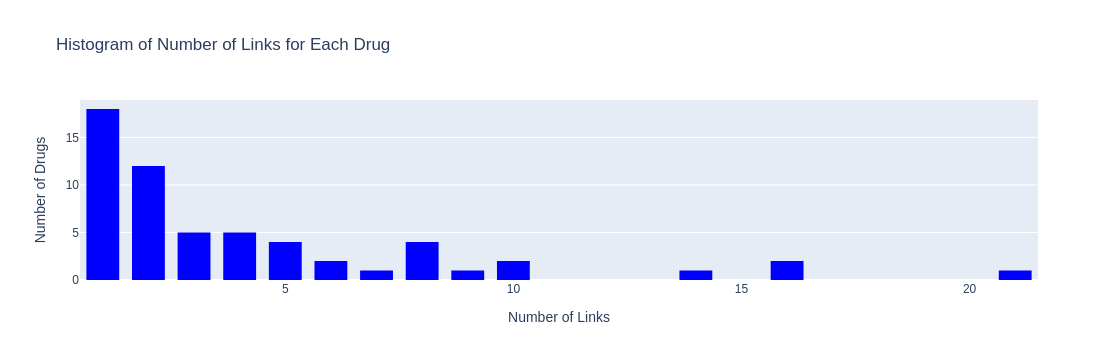

In [25]:
# 6) for links
import pandas as pd
import plotly.graph_objects as go
def plot_drug_link_histogram(df):
    links_info_df = extract_links(df)
    
    # Count the number of links each drug has
    drug_link_counts = links_info_df.groupby('name')['link_title'].nunique()
    
    # Create histogram
    fig = go.Figure(data=[go.Histogram(
        x=drug_link_counts,
        nbinsx=int(drug_link_counts.max()),  # Explicitly convert to int
        marker_color='blue'
    )])
    
    # Update layout
    fig.update_layout(
        title="Histogram of Number of Links for Each Drug",
        xaxis_title="Number of Links",
        yaxis_title="Number of Drugs",
        bargap=0.2,
        bargroupgap=0.1
    )
    
    fig.show()

# Example usage
# df_main should be your DataFrame containing the data
# Make sure 'df_main' has the columns: 'drugbank_id', 'name', 'links'
plot_drug_link_histogram(df_main)

In [38]:
df_main['drug_interactions']

0     [{'drugbank-id': 'DB06605', 'name': 'Apixaban'...
1     [{'drugbank-id': 'DB00255', 'name': 'Diethylst...
2                                                  None
3     [{'drugbank-id': 'DB00012', 'name': 'Darbepoet...
4     [{'drugbank-id': 'DB08879', 'name': 'Belimumab...
                            ...                        
95    [{'drugbank-id': 'DB09063', 'name': 'Ceritinib...
96    [{'drugbank-id': 'DB06643', 'name': 'Denosumab...
97                                                 None
98    [{'drugbank-id': 'DB00429', 'name': 'Carbopros...
99    [{'drugbank-id': 'DB06643', 'name': 'Denosumab...
Name: drug_interactions, Length: 100, dtype: object

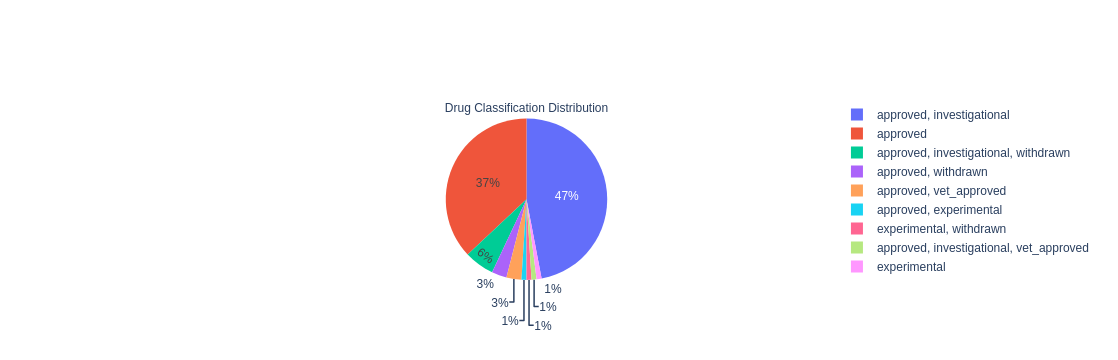

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [55]:
# 9), 10)
import pandas as pd
import plotly.graph_objects as go

def create_classification_counts_pie_chart(df):
    classification_counts = df['groups'].apply(lambda x: ', '.join(x)).value_counts().reset_index()
    classification_counts.columns = ['classification', 'count']
    
    fig = go.Figure(data=[go.Pie(labels=classification_counts['classification'], values=classification_counts['count'], title='Drug Classification Distribution')])
    fig.show()
    
    return fig, classification_counts

def count_approved_not_withdrawn(df):
    approved_not_withdrawn = df[df['groups'].apply(lambda x: 'approved' in x and 'withdrawn' not in x)].shape[0]
    return approved_not_withdrawn
    

def create_interactions_df(df):
    interactions = []
    for _, row in df.iterrows():
        # Ensure the drug_interactions column is parsed correctly
        if pd.isna(row['drug_interactions']) or row['drug_interactions'] == 'None':
            continue
        
        # Convert interaction strings to lists of dictionaries
        drug_interactions_list = ast.literal_eval(row['drug_interactions']) if isinstance(row['drug_interactions'], str) else row['drug_interactions']
        
        for interaction in drug_interactions_list:
            if isinstance(interaction, dict):
                interactions.append({
                    'drugbank_id': row['drugbank_id'],
                    'drug_name': row['name'],
                    'interacting_drug': interaction.get('drugbank-id', 'Unknown'),
                    'interaction': interaction.get('name', 'Unknown')
                })

    interactions_df = pd.DataFrame(interactions)
    return interactions_df

# Example usage
fig, classification_counts = create_classification_counts_pie_chart(df_main)
approved_not_withdrawn_count = count_approved_not_withdrawn(df_main)
interactions_df = create_interactions_df(df_main)

# Display the results
print(f"Number of approved drugs not withdrawn: {approved_not_withdrawn_count}")
print(interactions_df.head())